<a href="https://colab.research.google.com/github/Limeirelles/Python_Analise_de_Dados/blob/main/AdventureWorks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

In [ ]:
df = pd.read_excel("/content/drive/MyDrive/001_Projetos/Analise_de_Dados_com_Python_Pandas_DIO/datasets_dio/AdventureWorks.xlsx")

In [ ]:
df.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red


In [ ]:
# verificando se tem algum valor ausente(NULL)
df.isnull().sum()

,0
Data Venda,0
Data Envio,0
ID Loja,0
ID Produto,0
ID Cliente,0
No. Venda,0
Custo Unitário,0
Preço Unitário,0
Quantidade,0
Valor Desconto,0


In [ ]:
df.dtypes

,0
Data Venda,datetime64[ns]
Data Envio,datetime64[ns]
ID Loja,int64
ID Produto,int64
ID Cliente,int64
No. Venda,object
Custo Unitário,float64
Preço Unitário,float64
Quantidade,int64
Valor Desconto,float64


In [ ]:
df.shape

(904, 16)

In [ ]:
# Qual foi a receita total?
round(df["Valor Venda"].sum(), 2)

np.float64(5984606.14)

In [ ]:
# Qual o curto total? Aqui é pegar o custo por unidade multiplicado pela quantidade de cada produto.
df["Custo"] = df['Custo Unitário'].mul(df['Quantidade']) # criando a coluna de custo

In [ ]:
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48


In [ ]:
# qual o custo total?
round(df["Custo"].sum(), 2) # aqui o método round() arredonda as casas decimais, onde no parâmetro foi estabelecido o redondamento em 2 casas decimais.

np.float64(2486783.05)

In [ ]:
# Agora que temos a receita e o custo total, podemos achar o lucro total
df["Lucro"] = df["Valor Venda"] - df['Custo']

In [ ]:
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52


In [ ]:
# total de lucro para todos os produtos
round(df["Lucro"].sum(), 2)

np.float64(3497823.09)

In [ ]:
# criando uma coluna com o total de dias para enviar o produto
df["Tempo_envio"] = df['Data Envio'] - df['Data Venda']

In [ ]:
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo_envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,20 days


# Agora queremos saber a média do tempo de envio para cada marca, então foi feito a transformação da coluna [Tempo_envio] em numero de dias

In [ ]:
# extraindo apenas os dias
df["Tempo_envio"] = (df['Data Envio'] - df['Data Venda']).dt.days

In [ ]:
pd.options.display.float_format = '{:.2f}'.format

In [ ]:
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo_envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,4548.00,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,20


In [ ]:
# média do tempo de envio por marca
df.groupby("Marca")["Tempo_envio"].mean()

,Tempo_envio
Marca,
Adventure Works,8.66
Contoso,8.47
Fabrikam,8.51


# Agora vamos saber qualé o lucro por ano e por maca

In [ ]:
pd.options.display.float_format = '{:20,.2f}'.format

In [ ]:
# vamos agrupar por ano e marca, por fim somar o lucro.
df.groupby([df["Data Venda"].dt.year, "Marca"])["Lucro"].sum()


Data Venda  Marca          
2008        Adventure Works             306,641.16
            Contoso                      56,416.00
            Fabrikam                  1,557,020.55
2009        Adventure Works             405,395.08
            Contoso                     138,258.95
            Fabrikam                  1,034,091.35
Name: Lucro, dtype: float64

In [ ]:
# Resetando o index. Será criado uma nova variável, para que seja armazenado as informações agrupadas de marcas, ano e vendas.
# Assim, será armazenado em formato dataframe, coluna e linha com seus index. Foi utilizado do método reset_index()
# Com o reset_index() as informações podem ser salvas em um arquivo excel, por exemplo, extraindo apenas as informações tabuladas e sumarizadas que se deseja.
lucro_ano = df.groupby([df["Data Venda"].dt.year, "Marca"])["Lucro"].sum().reset_index()
lucro_ano

,Data Venda,Marca,Lucro
0,2008,Adventure Works,"306,641.16"
1,2008,Contoso,"56,416.00"
2,2008,Fabrikam,"1,557,020.55"
3,2009,Adventure Works,"405,395.08"
4,2009,Contoso,"138,258.95"
5,2009,Fabrikam,"1,034,091.35"


In [ ]:
# Qual o total de produtos vendidos?
df.groupby("Produto")["Quantidade"].sum().sort_values(ascending=False)


,Quantidade
Produto,
Headphone Adapter for Contoso Phone E130 Silver,25232
Headphone Adapter for Contoso Phone E130 White,25008
Adventure Works Laptop15.4W M1548 Black,1089
Fabrikam Trendsetter 2/3'' 17mm X100 Grey,1087
Adventure Works Laptop15.4W M1548 Red,1047
Fabrikam Trendsetter 2/3'' 17mm X100 Black,926
Fabrikam Trendsetter 1/3'' 8.5mm X200 Black,884
Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey,845
Fabrikam Trendsetter 1/3'' 8.5mm X200 White,789


Text(0, 0.5, 'Produto')

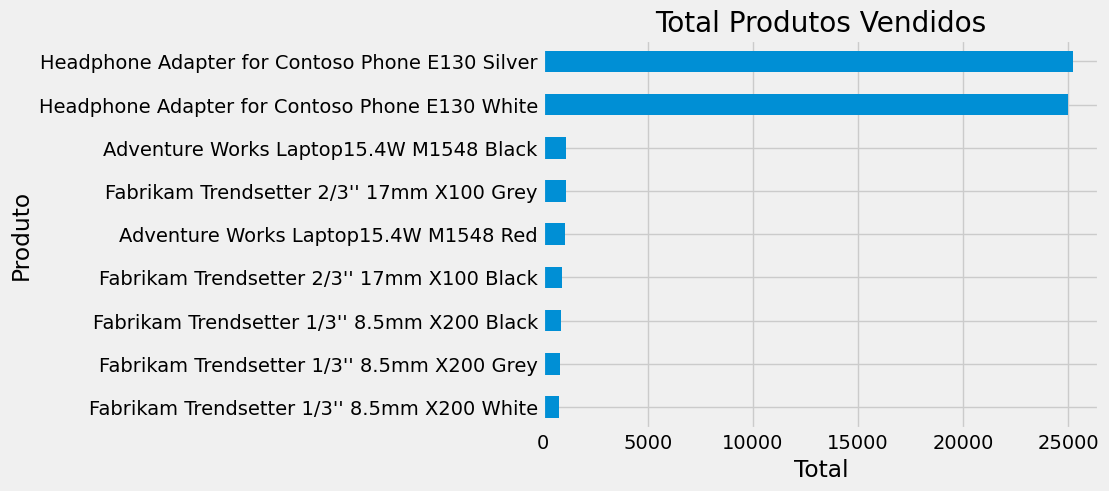

In [ ]:
# Gráfico com total de produtos vendidos
df.groupby("Produto")["Quantidade"].sum().sort_values(ascending=True).plot.barh(plt.title("Total Produtos Vendidos"))
plt.xlabel("Total")
plt.ylabel("Produto")

Text(0, 0.5, 'Receita')

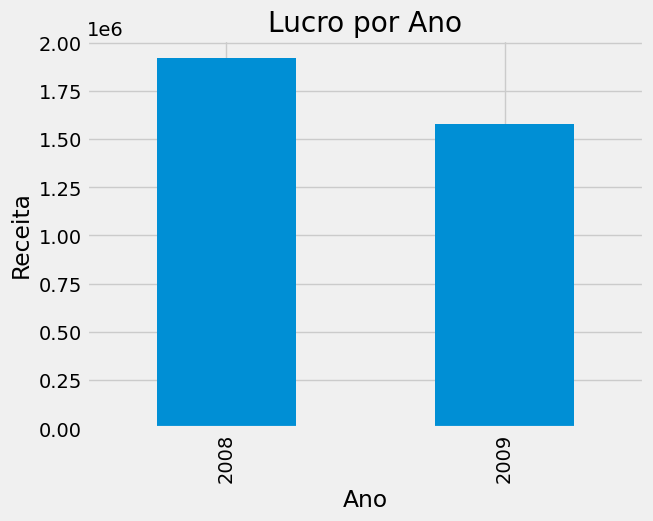

In [ ]:
# Gráfico de lucro por ano
df.groupby(df["Data Venda"].dt.year)["Lucro"].sum().plot.bar(title="Lucro por Ano")
plt.xlabel("Ano")
plt.ylabel("Receita")

In [ ]:
# sem o plot do gráfico
df.groupby(df["Data Venda"].dt.year)["Lucro"].sum()

,Lucro
Data Venda,
2008,"1,920,077.71"
2009,"1,577,745.38"


In [ ]:
# seleciando apenas as vendas de 2009
df_2009 = df[df["Data Venda"].dt.year == 2009]

In [ ]:
df_2009.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo_envio
11,2009-05-02,2009-05-14,199,384,18938,200905023CS847,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",12
12,2009-05-16,2009-05-27,306,384,19067,200905163CS746,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",11
13,2009-05-31,2009-06-12,306,384,19068,200905313CS748,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",12
14,2009-06-28,2009-07-11,199,384,18959,200906283CS870,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",13
15,2009-07-08,2009-07-12,306,384,19070,200907083CS757,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",4


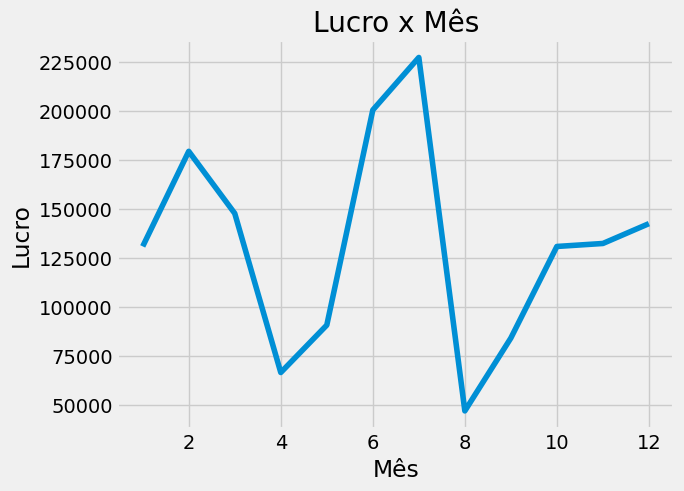

In [ ]:
df_2009.groupby(df_2009["Data Venda"].dt.month)["Lucro"].sum().plot(title="Lucro x Mês")
plt.xlabel("Mês")
plt.ylabel("Lucro");


In [ ]:
df_2009.groupby(df_2009["Data Venda"].dt.month)["Lucro"].sum()

,Lucro
Data Venda,
1,"130,719.04"
2,"179,228.92"
3,"147,538.25"
4,"66,354.39"
5,"90,540.00"
6,"200,310.41"
7,"227,134.51"
8,"46,756.42"
9,"83,952.62"


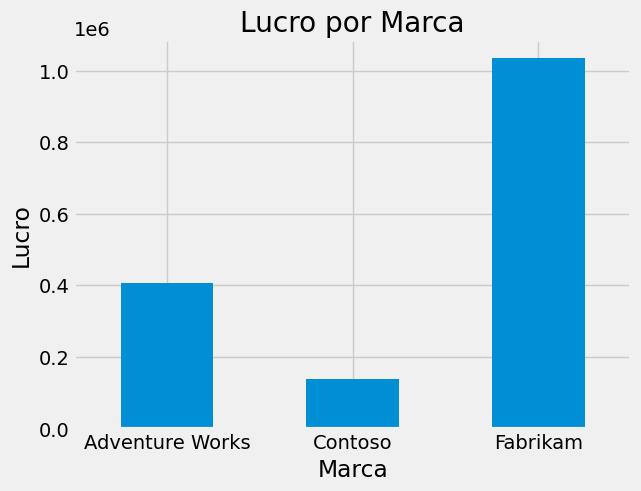

In [ ]:
# Saber qual a marca que está dando mais lucro.
df_2009.groupby("Marca")["Lucro"].sum().plot.bar(title="Lucro por Marca")
plt.xlabel("Marca")
plt.ylabel("Lucro")
plt.xticks(rotation="horizontal");# aqui foi formatado na horizontal os nomes das marcas.

In [ ]:
df_2009.groupby("Marca")["Lucro"].sum()

,Lucro
Marca,
Adventure Works,"405,395.08"
Contoso,"138,258.95"
Fabrikam,"1,034,091.35"


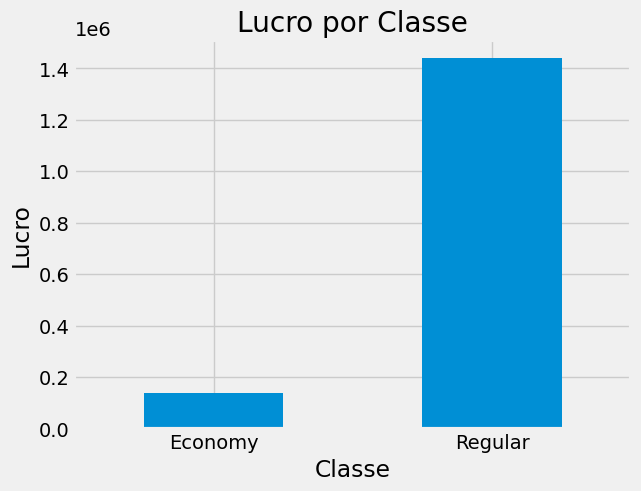

In [ ]:
# Qual o lucro por classe de produto?
df_2009.groupby("Classe")["Lucro"].sum().plot.bar(title="Lucro por Classe")
plt.xlabel("Classe")
plt.ylabel("Lucro")
plt.xticks(rotation="horizontal");

In [ ]:
df_2009.groupby("Classe")["Lucro"].sum()

,Lucro
Classe,
Economy,"138,258.95"
Regular,"1,439,486.43"


In [ ]:
df["Tempo_envio"].describe()
# aqui é interessante verificar os quartis, onde a média está próxima da nossa mediana.

,Tempo_envio
count,904.00
mean,8.54
std,3.06
min,4.00
25%,6.00
50%,9.00
75%,11.00
max,20.00


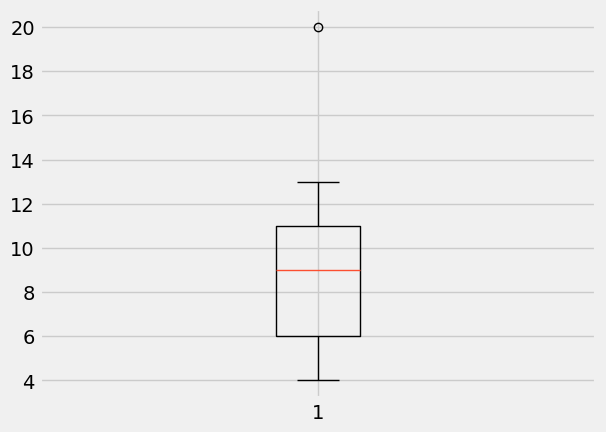

In [ ]:
# Gráfico de Boxplot para a descrição estatística das entregas
plt.boxplot(df["Tempo_envio"]);

# aqui temos um outlier no valor de 20 que é uma discrepância, podendo ser um valor que se distância dos demais, podendo ter várias razões.

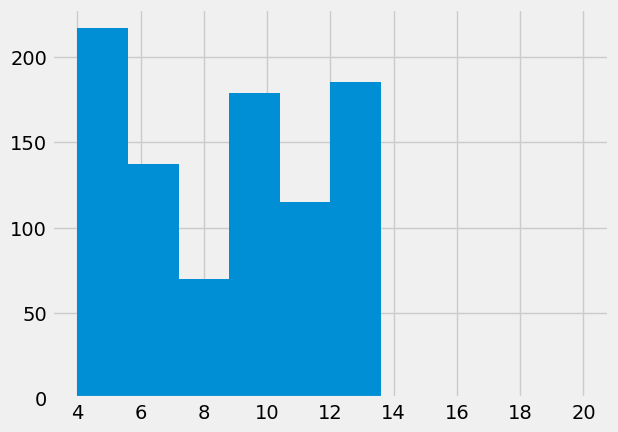

In [ ]:
# Histograma
plt.hist(df["Tempo_envio"]);

In [ ]:
# Tempo mínimo de envio
df["Tempo_envio"].min()

4

In [ ]:
# Tempo máximo de envio
df["Tempo_envio"].max()


20

In [ ]:
# Identificando o Outlier, buscando a linha que o valor discrêpante aparece.
df[df["Tempo_envio"] == 20]

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo_envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",20


In [ ]:
# Salvar a base de analise em um arquivo .csv

df.to_csv("df_vendas_novo.csv", index=False)